<a href="https://colab.research.google.com/github/gautampatil-groot/Bike-Sharing-Demand-Prediction-ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from numpy import arange


from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read CSV file into a DataFrame
bike_df = pd.read_csv('/content/drive/MyDrive/Datasets/SeoulBikeData.csv', encoding='ISO-8859-1')

# Create a copy of the DataFrame
bike = bike_df.copy()

# Exploratory data analysis

In [ ]:
# Display the first few rows of the DataFrame
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Rename columns in the DataFrame
bike.rename(columns={
    'Rented Bike Count': 'Rented_Bike_Count',
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind_speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall',
    'Functioning Day': 'Functioning_Day'
}, inplace=True)


In [ ]:
# Display the first few rows of the DataFrame
bike.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Display the last few rows of the DataFrame
bike.tail()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Get information about the DataFrame
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# Generate descriptive statistics of the DataFrame
bike.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Count the number of duplicated rows in the DataFrame
bike.duplicated().sum()

0

In [ ]:
# Count the number of null values in each column of the DataFrame
bike.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
# Convert 'Date' column to datetime format
bike['Date'] = pd.to_datetime(bike['Date'])

# Extract month from 'Date' column and create a new 'Month' column
bike['Month'] = bike['Date'].apply(lambda x: x.month)

# Extract day of the week from 'Date' column and create a new 'day_of_weeks' column
bike['day_of_weeks'] = bike['Date'].dt.day_name()

# Create a new 'holiday_days' column to identify weekends as holidays (1) and weekdays as non-holidays (0)
bike['holiday_days'] = bike['day_of_weeks'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

# Drop 'Date' and 'day_of_weeks' columns from the DataFrame
bike = bike.drop(columns=['Date', 'day_of_weeks'], axis=1)


In [ ]:
# Get the shape of the DataFrame
bike.shape

(8760, 15)

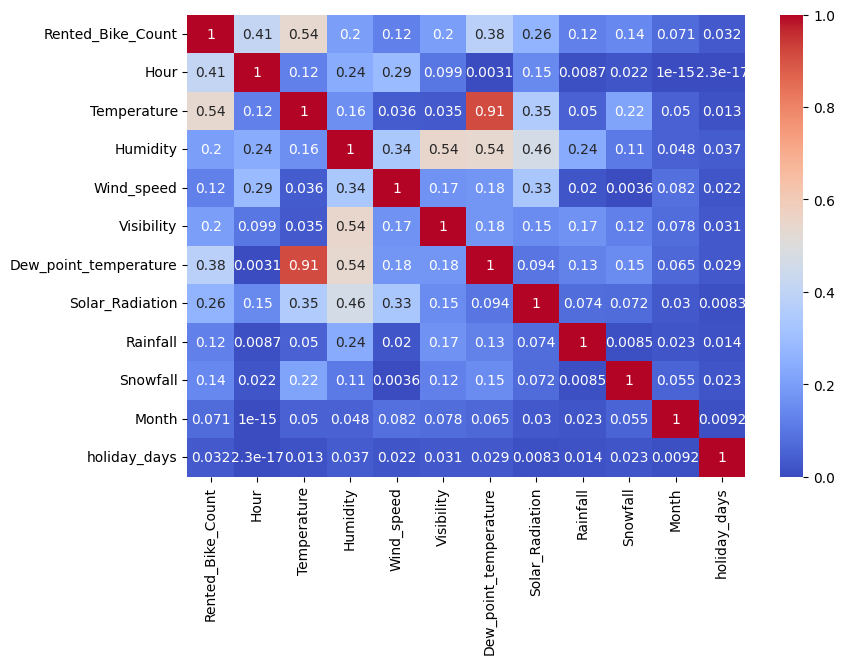

In [ ]:
# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(bike.corr().abs(), cmap='coolwarm', annot=True)

# Display the heatmap
plt.show()

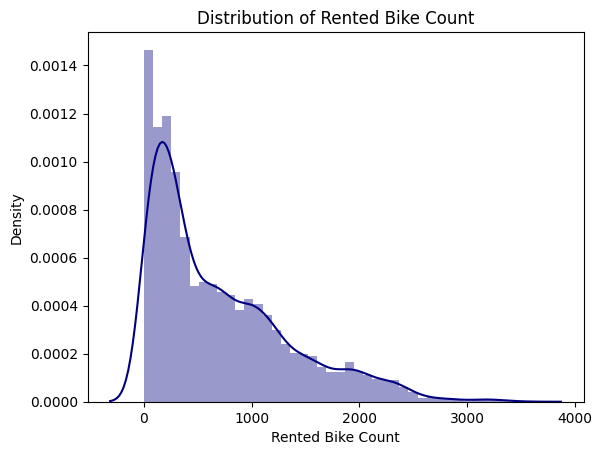

In [ ]:
# Creates a distribution plot of the rented bike count
sns.distplot(bike['Rented_Bike_Count'], color='navy')

# Sets plot title, xticks, and yticks.
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

# Displays the plot with the provided title and labels.
plt.show()


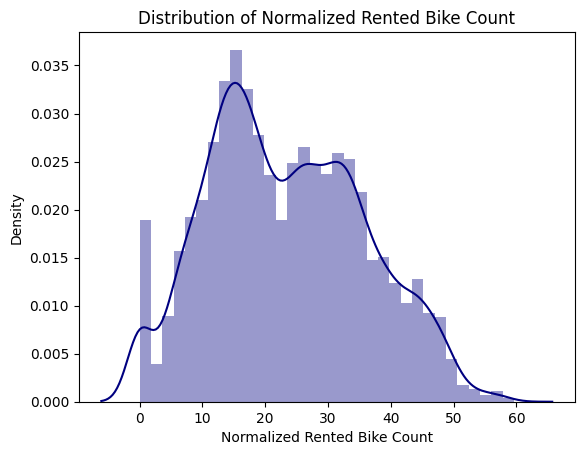

In [ ]:
normalized_data = np.sqrt(bike['Rented_Bike_Count'])

# Creates a distribution plot of the normalized rented bike count
sns.distplot(normalized_data, color='navy')

# Sets plot title, xticks, and yticks.
plt.title('Distribution of Normalized Rented Bike Count')
plt.xlabel('Normalized Rented Bike Count')
plt.ylabel('Density')

# Displays the plot with the provided title and labels.
plt.show()


In [ ]:
# Select numeric variables from the DataFrame
numeric_var = bike.select_dtypes(exclude='object')

# Get information about the numeric variables
numeric_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Month                  8760 non-null   int64  
 11  holiday_days           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


### Distribution of Hour, Rented bike count and differentiating bars by Holiday

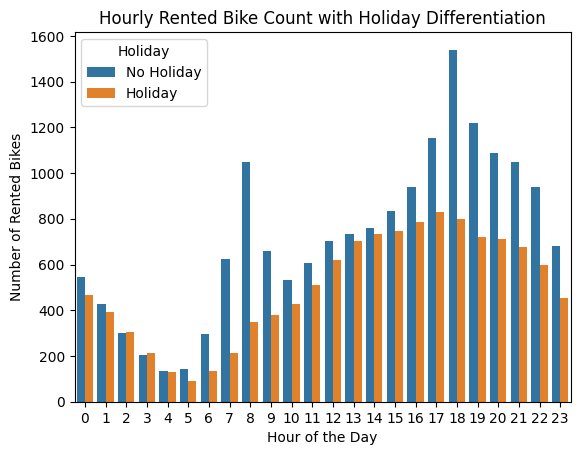

In [ ]:
# Creates a grouped bar plot
sns.barplot(data=bike, x='Hour', y='Rented_Bike_Count', hue='Holiday', ci=None)

# Sets plot title, xticks, and yticks.
plt.title("Hourly Rented Bike Count with Holiday Differentiation")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rented Bikes')

# Adds a legend for the holiday categories.
plt.legend(title='Holiday')

# Displays the plot with the provided title and labels.
plt.show()


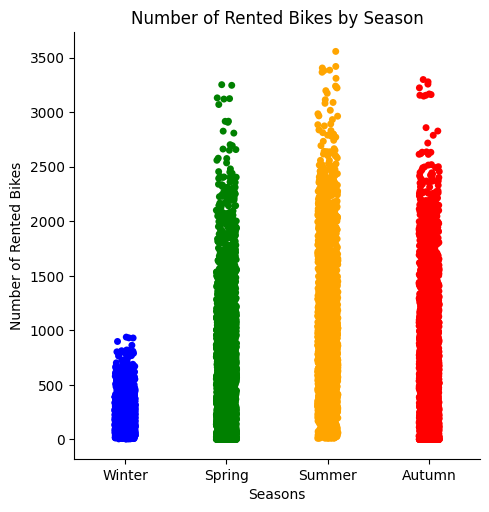

In [ ]:
# Creates a categorical plot with color-coded seasons.
sns.catplot(data=bike, x='Seasons', y='Rented_Bike_Count', palette=['blue', 'green', 'orange', 'red'])

# Sets plot title, xticks, and yticks.
plt.xlabel('Seasons')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes by Season')

# Displays the plot with the provided title and labels.
plt.show()


In [1]:
bike

NameError: ignored

In [ ]:
sns.countplot(data=bike, x = )

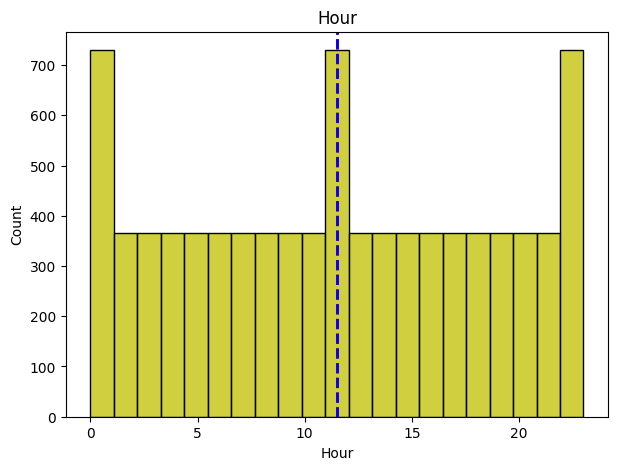

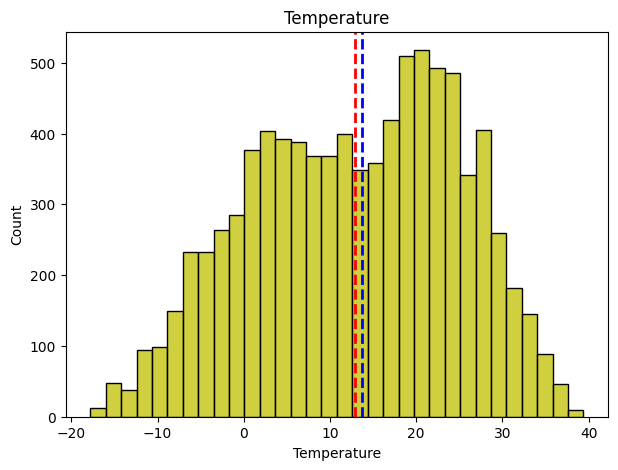

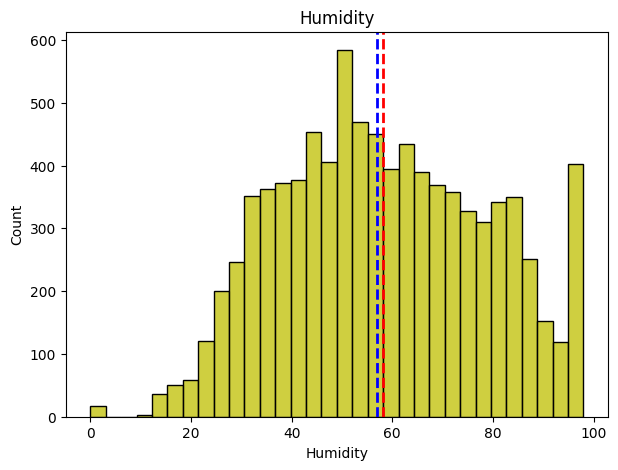

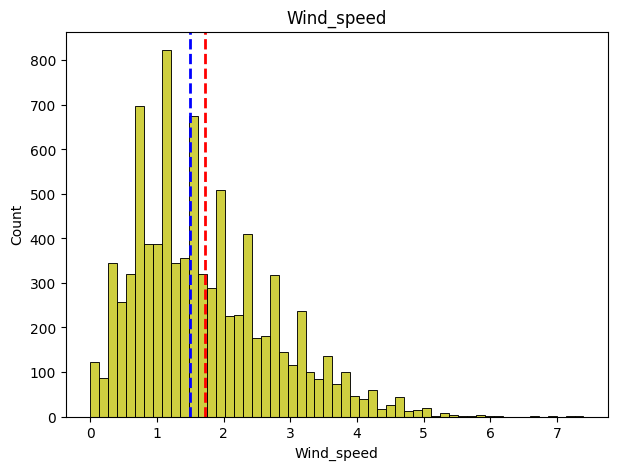

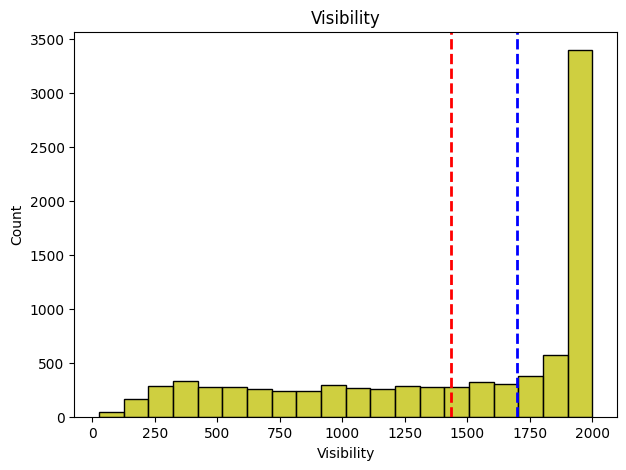

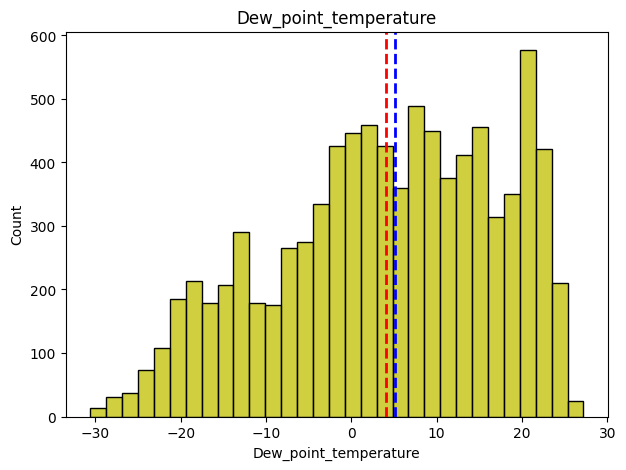

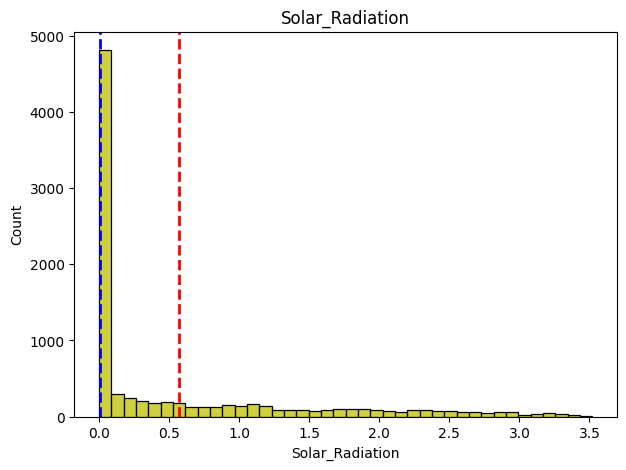

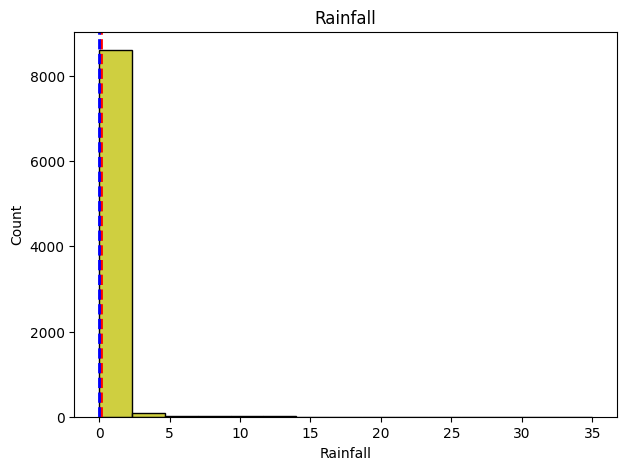

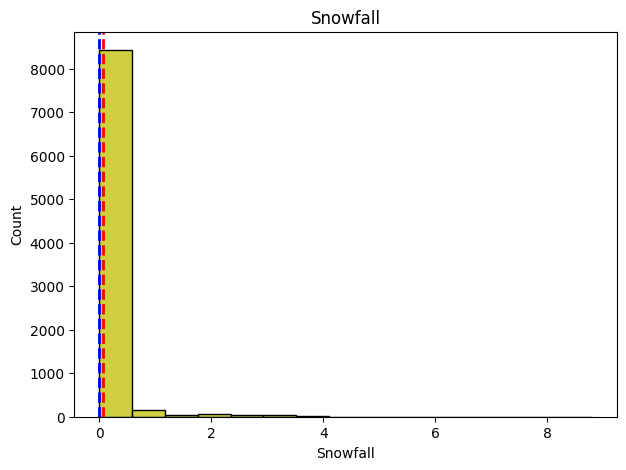

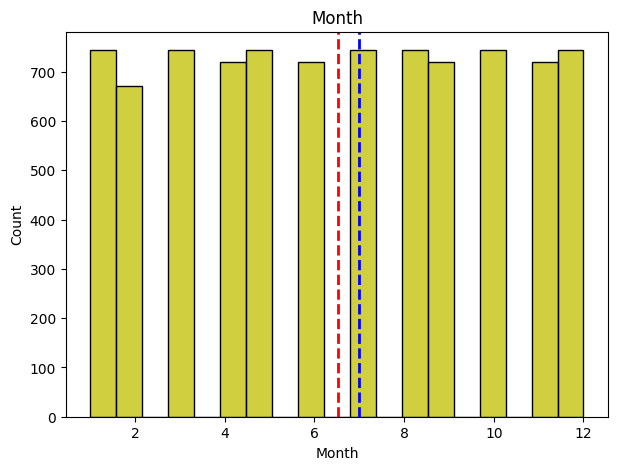

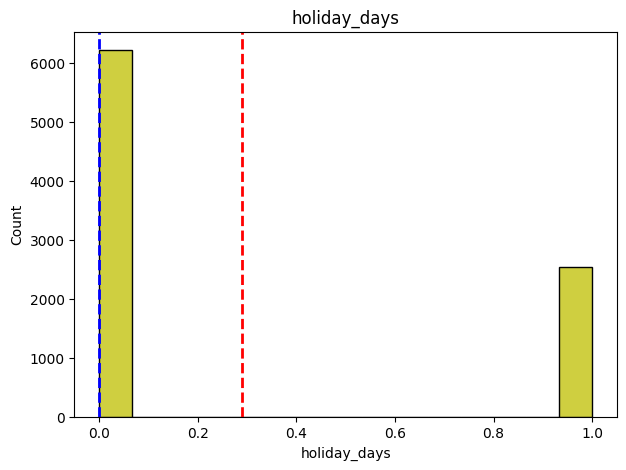

In [ ]:
# Loop through numeric variables and create histograms with mean and median
for col in numeric_var:
  if col != 'Rented_Bike_Count':
    fig = plt.figure(figsize=(7, 5))
    sns.histplot(bike[col], color='y')
    plt.axvline(bike[col].mean(), color='r', linestyle='dashed', lw=2)
    plt.axvline(bike[col].median(), color='b', linestyle='dashed', lw=2)
    plt.title(col)
    plt.show()


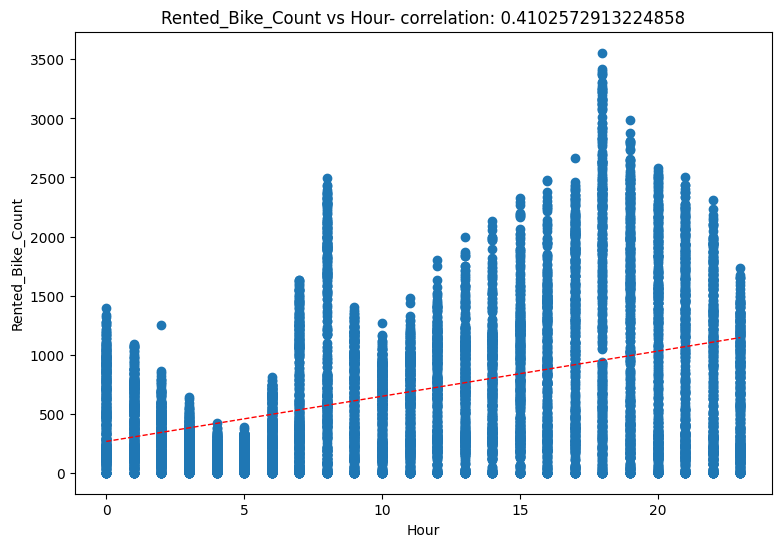

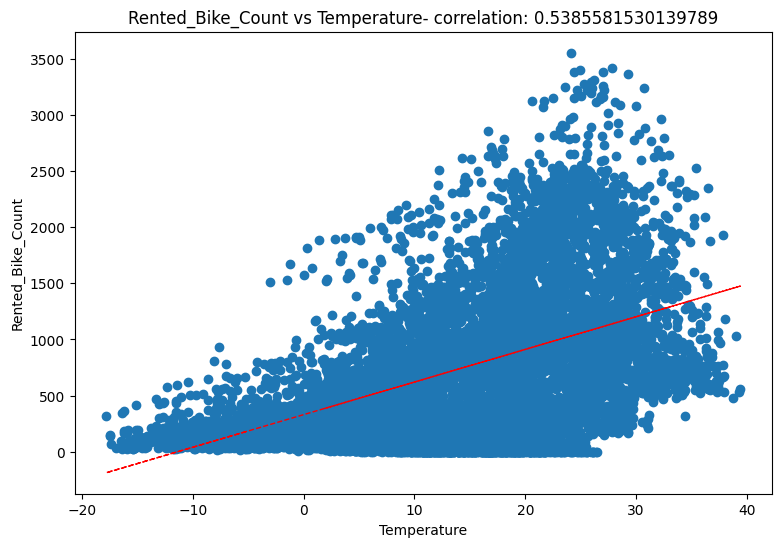

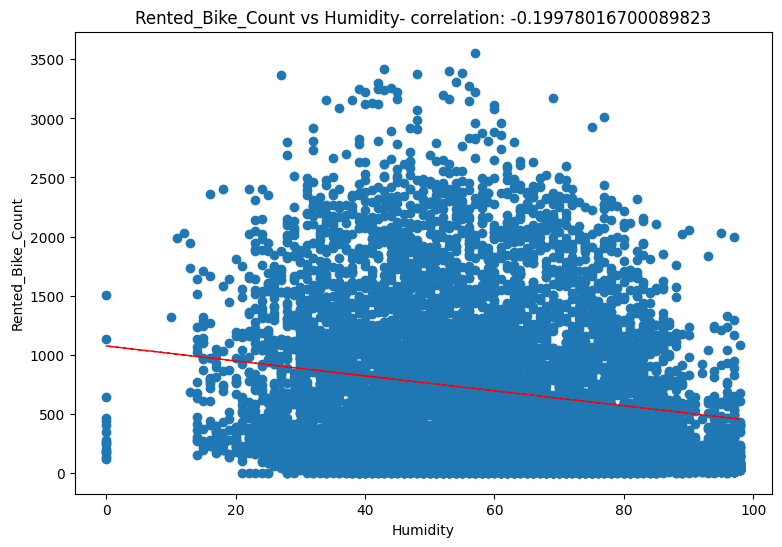

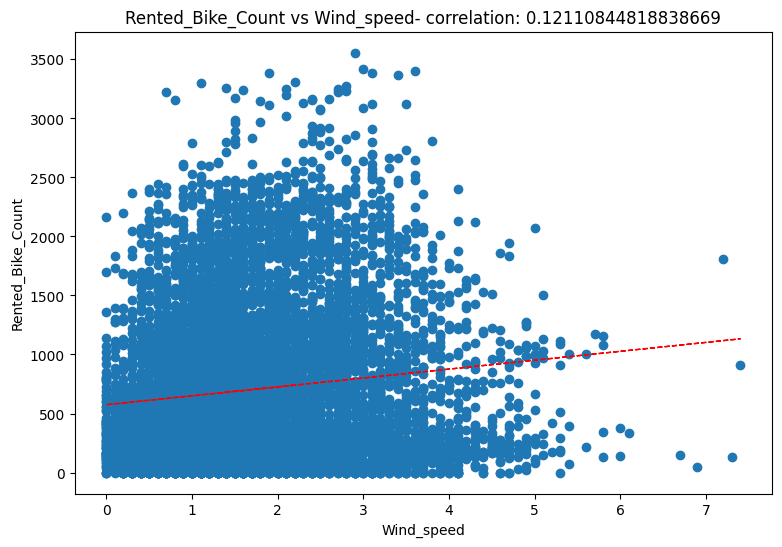

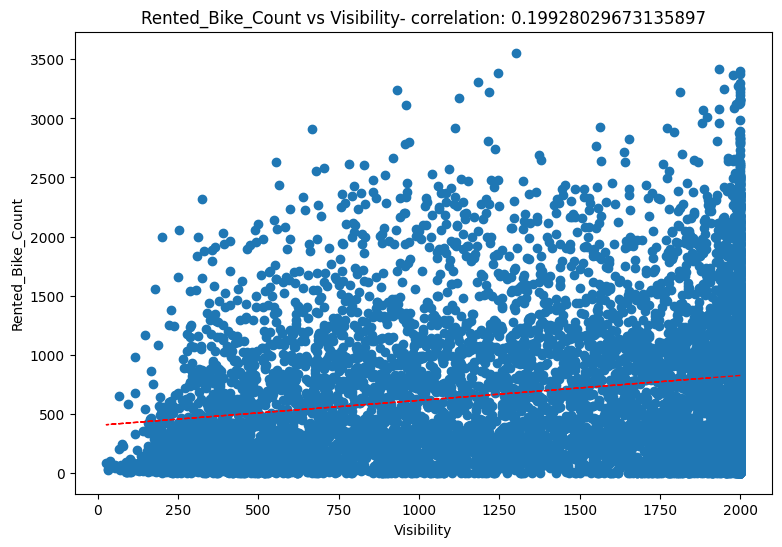

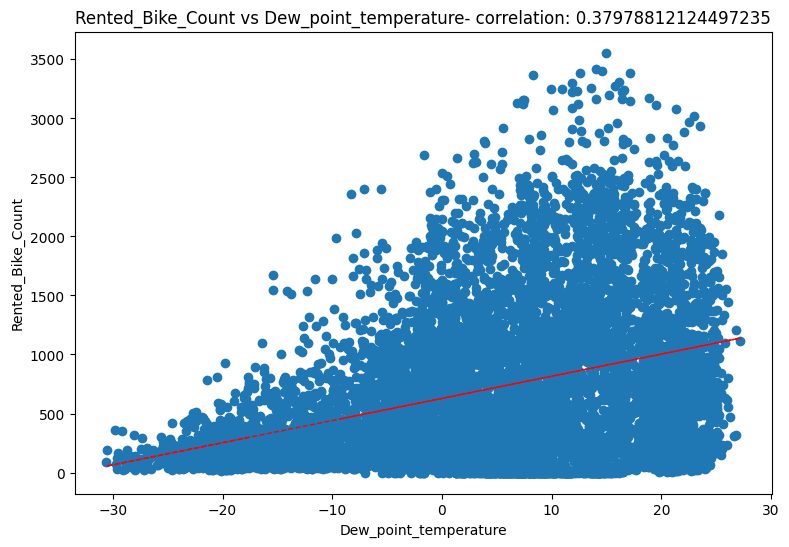

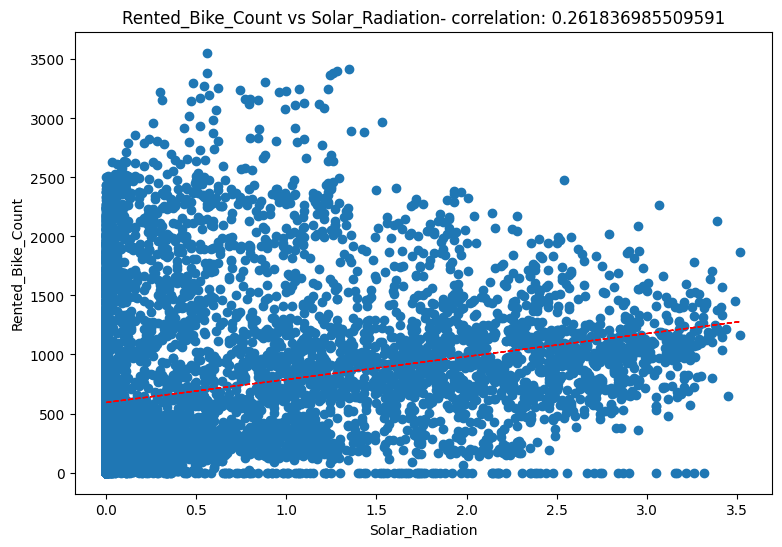

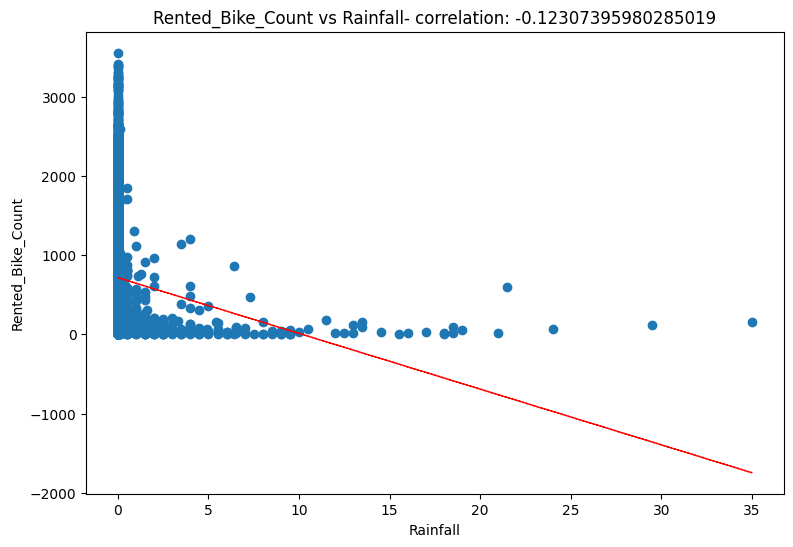

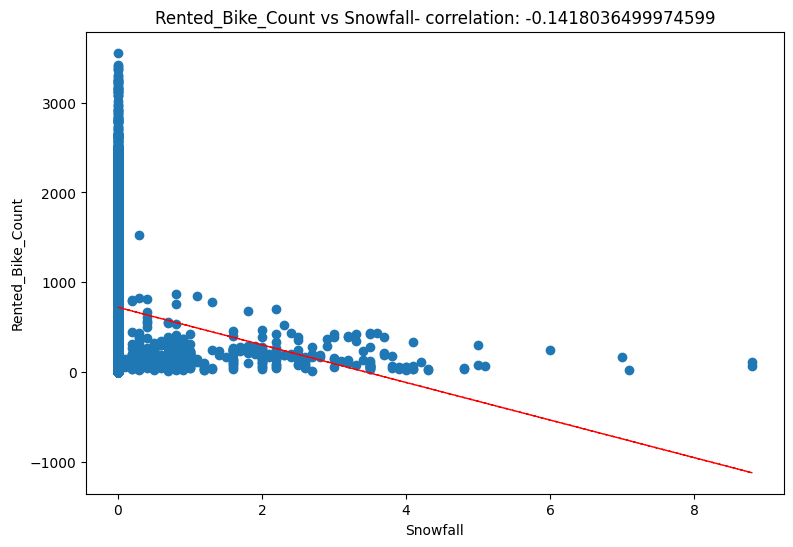

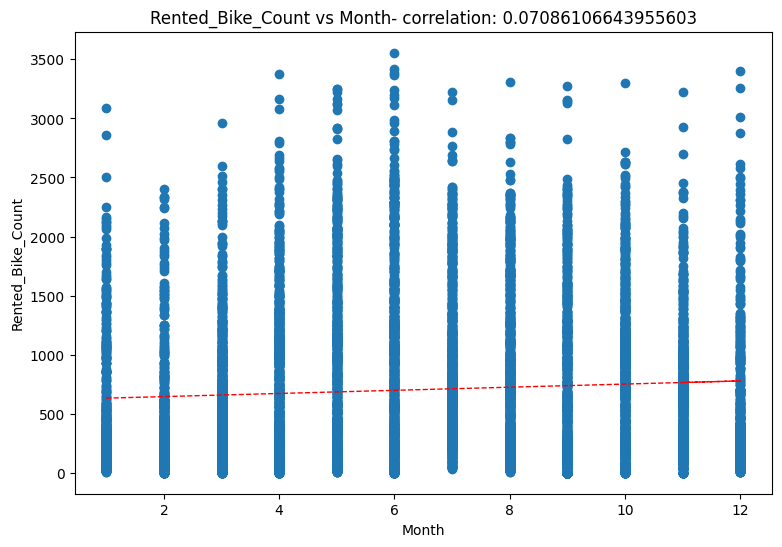

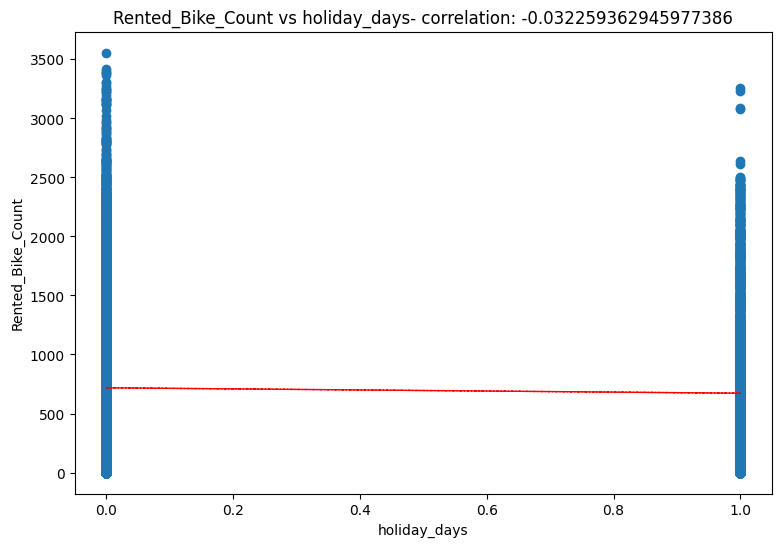

In [ ]:
# Loop through numeric variables and create scatter plots with correlation
for col in numeric_var:
    if col != 'Rented_Bike_Count':
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      feature = bike[col]
      label = bike['Rented_Bike_Count']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label)
      plt.xlabel(col)
      plt.ylabel('Rented_Bike_Count')
      ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(bike[col], bike['Rented_Bike_Count'], 1)
      y_hat = np.poly1d(z)(bike[col])

      plt.plot(bike[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
#Create DataFrame of Categorical Variables
categorical_variables = bike.select_dtypes(include = 'object')

In [ ]:
categorical_variables

,Seasons,Holiday,Functioning_Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
# Perform one-hot encoding on the 'Seasons' column
season_encoding = pd.get_dummies(bike['Seasons'])

In [ ]:
# Convert 'Holiday' column to binary indicator
categorical_variables['Holiday'] = categorical_variables['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [ ]:
# Convert 'Functioning_Day' column to binary indicator
categorical_variables['Functioning_Day'] = categorical_variables['Functioning_Day'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Concatenate categorical variables and season encoding, then drop 'Seasons' column
categorical_df = pd.concat([categorical_variables, season_encoding], axis = 1)
categorical_df = categorical_df.drop(['Seasons'], axis = 1)

In [ ]:
categorical_df

,Holiday,Functioning_Day,Autumn,Spring,Summer,Winter
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
8755,0,1,1,0,0,0
8756,0,1,1,0,0,0
8757,0,1,1,0,0,0
8758,0,1,1,0,0,0


In [ ]:
# Combine categorical and numeric variables into a single dataframe
merged_data  = pd.concat([categorical_df, numeric_var], axis = 1)

In [ ]:
merged_data.T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Holiday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Functioning_Day,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,...,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0
Autumn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0
Spring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Winter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Rented_Bike_Count,254.0,204.0,173.0,107.0,78.0,100.0,181.0,460.0,930.00,490.00,...,761.00,768.00,837.00,1047.00,1384.0,1003.0,764.0,694.0,712.0,584.0
Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.00,9.00,...,14.00,15.00,16.00,17.00,18.0,19.0,20.0,21.0,22.0,23.0
Temperature,-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.60,-6.50,...,7.80,7.00,7.20,6.00,4.7,4.2,3.4,2.6,2.1,1.9
Humidity,37.0,38.0,39.0,40.0,36.0,37.0,35.0,38.0,37.00,27.00,...,20.00,20.00,23.00,29.00,34.0,34.0,37.0,39.0,41.0,43.0


In [ ]:
# Calculate Variance Inflation Factor (VIF) for each variable
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [ ]:
# Calculate VIF for selected variables in merged_data
merged_vif = calc_vif(merged_data [[i for i in merged_data .describe().columns if i not in [
                                                                                'Rented_Bike_Count', 'Dew_point_temperature',
                                                                                'Autumn','Spring', 'Summer', 'Winter',
                                                                                'Functioning_Day', 'Holiday'
                                                                                ]]])

In [ ]:
merged_vif

,Variables,VIF
0,Hour,3.961874
1,Temperature,3.236809
2,Humidity,6.114153
3,Wind_speed,4.616621
4,Visibility,5.404128
5,Solar_Radiation,2.272068
6,Rainfall,1.081252
7,Snowfall,1.125304
8,Month,4.580307
9,holiday_days,1.399708


dew point

# All Model Scores Empty List

**created Empty lists of the Evaluation Metric parameters**

In [ ]:
mean_sq_err_list = []
Rmse_list = []
r2_list = []
adj_r2_list = []

# Linear Models

In [ ]:
# Store Independent Variable
x = merged_data.drop(['Rented_Bike_Count', 'Dew_point_temperature'], axis=1)

# Store Dependent variable
y = np.sqrt(merged_data['Rented_Bike_Count'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
x_train_scaled = scaler.fit_transform(x_train)

# Scale the testing data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# Print the shapes of the scaled data
print("Scaled training data shape:", x_train_scaled.shape)
print("Scaled testing data shape:", x_test_scaled.shape)


Scaled training data shape: (6132, 16)
Scaled testing data shape: (2628, 16)


**Below is Function named linear_models which consists of code of Fitting model, prediction of model, Evaluation Metrics, Graph for understanding the predicted data and finally the scores are stored in respective lists**

In [ ]:
def linear_models(model, x_train, x_test, y_train, y_test):
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Predict the target variable for the test data
    y_test_pred = model.predict(x_test)

    # Evaluation Metrics
    print("=============== Model Evaluation ===============")

    # Calculate Mean Squared Error (MSE)
    MSE = mean_squared_error(np.square(y_test), np.square(y_test_pred))
    print("Mean Squared Error (MSE):        {:.4f}".format(MSE))

    # Calculate Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE):  {:.4f}".format(RMSE))

    # Calculate R^2 Score
    r2 = r2_score(np.square(y_test), np.square(y_test_pred))
    print("R^2 Score:                       {:.4f}".format(r2))

    # Calculate Adjusted R^2 Score
    adjusted_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
    print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))
    print("================================================")

    # Storing Values in List
    mean_sq_err_list.append(MSE)
    Rmse_list.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adjusted_r2)


    # Plot the predicted and actual values (first 100 data points)
    plt.figure(figsize=(13, 6))
    plt.plot(np.square(y_test_pred[:100]), label='Predicted', color = 'red')
    plt.plot(np.square(np.array(y_test[:100])), label='Actual', color = 'green')
    plt.legend(['Predicted', 'Actual'])
    plt.show()

## Linear Regression

=============== Model Evaluation ===============
Mean Squared Error (MSE):        176067.0426
Root Mean Squared Error (RMSE):  419.6034
R^2 Score:                       0.5703
Adjusted R^2 Score:              0.5696


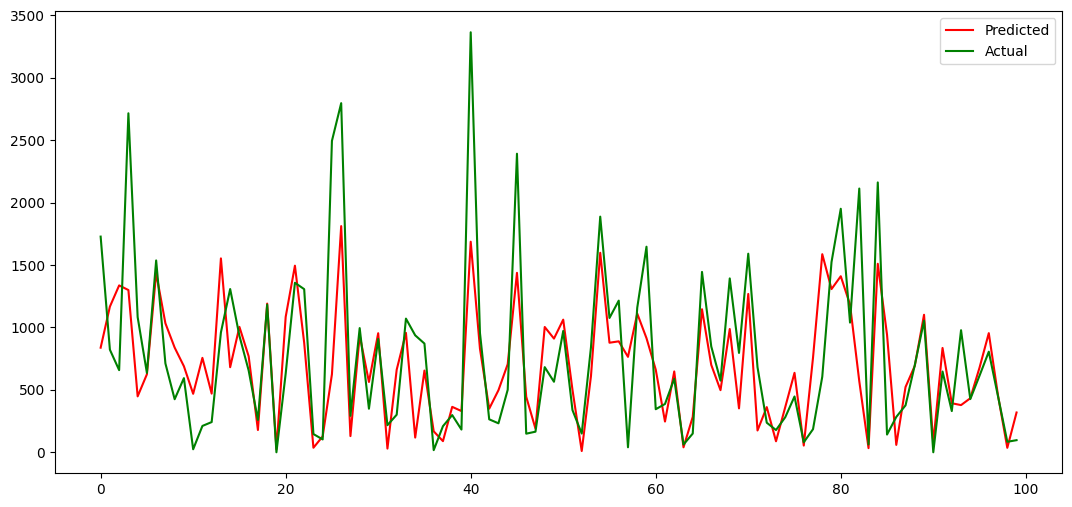

In [ ]:
linear_models(LinearRegression(), x_train, x_test, y_train, y_test)

## Ridge Regression

In [ ]:
ridge_reg = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_cv = GridSearchCV(ridge_reg, parameters, scoring = 'r2' , cv = 5)

=============== Model Evaluation ===============
Mean Squared Error (MSE):        176067.3187
Root Mean Squared Error (RMSE):  419.6038
R^2 Score:                       0.5703
Adjusted R^2 Score:              0.5696


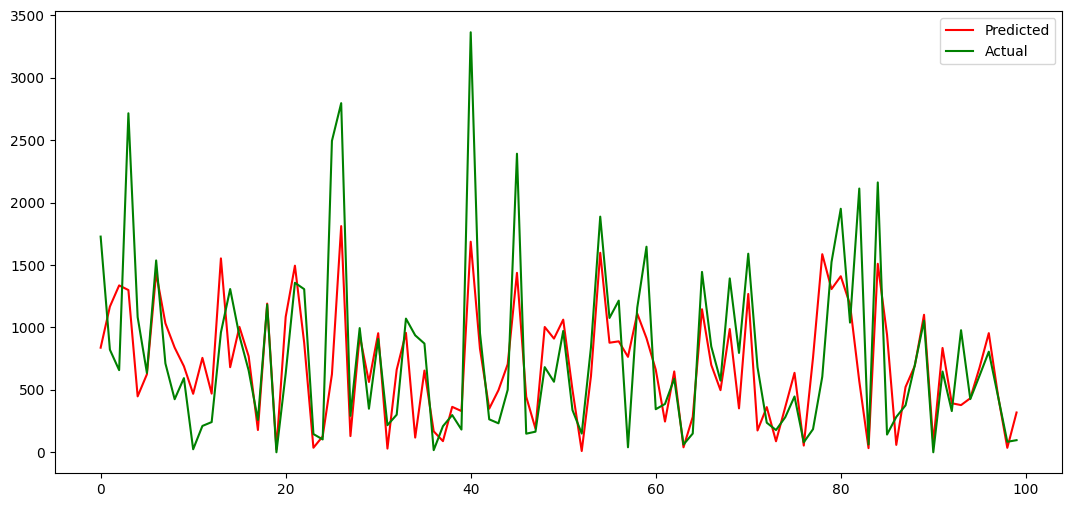

In [ ]:
linear_models(ridge_cv, x_train, x_test, y_train, y_test)

## Lasso Regression

In [ ]:
lasso_reg = Lasso()
parameters = {"alpha" : [1e-15,1e-13,1e-10,1e-8,1e-5,0.0014]}
lasso_cv = GridSearchCV(lasso_reg, parameters, scoring = 'r2' , cv = 3)

=============== Model Evaluation ===============
Mean Squared Error (MSE):        176106.9269
Root Mean Squared Error (RMSE):  419.6510
R^2 Score:                       0.5703
Adjusted R^2 Score:              0.5695


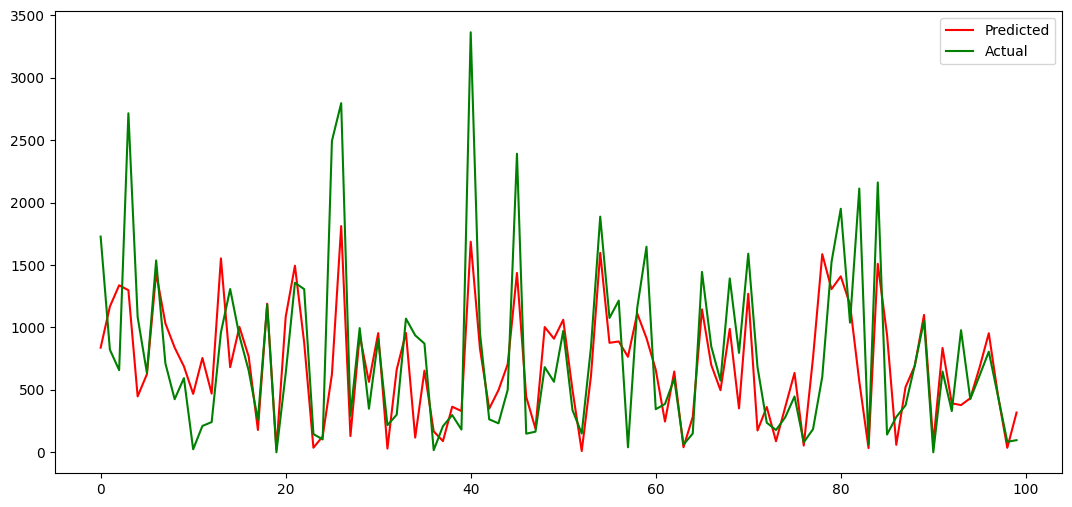

In [ ]:
linear_models(lasso_cv, x_train, x_test, y_train, y_test)

## Elastic Net

In [ ]:
elastic_mod = ElasticNet()
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio' : [0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_cv = GridSearchCV(elastic_mod, parameters, scoring = 'r2', cv = 5)

=============== Model Evaluation ===============
Mean Squared Error (MSE):        176124.3900
Root Mean Squared Error (RMSE):  419.6718
R^2 Score:                       0.5702
Adjusted R^2 Score:              0.5694


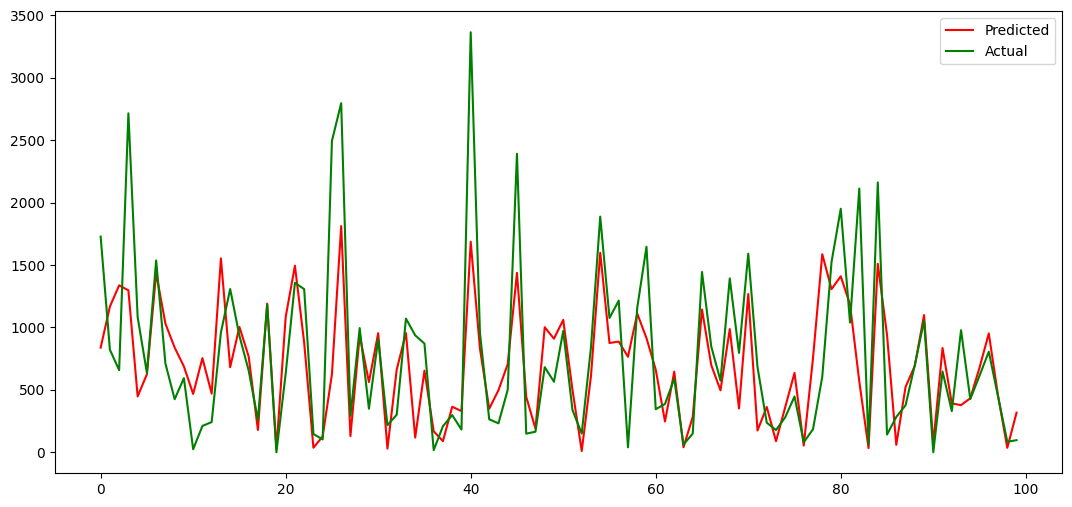

In [ ]:
linear_models(elastic_cv, x_train, x_test, y_train, y_test)

**from above scores and four models Linear , Elastic Net, Lasso, Ridge Regression predictions  we can say that there is not much difference in R2 among models is negligible.**

# Non-Parametric Models

In [ ]:
# Store Independent Variable
x1 = merged_data.drop(['Rented_Bike_Count', 'Dew_point_temperature'], axis=1)

# Store Dependent variable
y1 = merged_data['Rented_Bike_Count']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=42)

In [ ]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
x_train = scaler.fit_transform(x_train)

# Scale the testing data using the fitted scaler
x_test = scaler.transform(x_test)

# Print the shapes of the scaled data
print("Scaled training data shape:", x_train.shape)
print("Scaled testing data shape:", x_test.shape)

Scaled training data shape: (6132, 16)
Scaled testing data shape: (2628, 16)


In [ ]:
def reg_models(model, x_train, x_test, y_train, y_test):
    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Predict the target variable for the test data
    y_test_pred = model.predict(x_test)

    # Evaluation Metrics
    print("=============== Model Evaluation ===============")

    # Calculate Mean Squared Error (MSE)
    MSE = mean_squared_error(y_test, y_test_pred)
    print("Mean Squared Error (MSE):        {:.4f}".format(MSE))

    # Calculate Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE):  {:.4f}".format(RMSE))

    # Calculate R^2 Score
    r2 = r2_score(y_test, y_test_pred)
    print("R^2 Score:                       {:.4f}".format(r2))

    # Calculate Adjusted R^2 Score
    adjusted_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
    print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))
    print("================================================")

    # Storing the Metrics in List
    mean_sq_err_list.append(MSE)
    Rmse_list.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adjusted_r2)

    # Plot the predicted and actual values (first 100 data points)
    plt.figure(figsize=(9, 6))
    plt.plot(y_test_pred[:100], label='Predicted', color = 'red')
    plt.plot(np.array(y_test[:100]), label='Actual', color = 'green')
    plt.legend(['Predicted', 'Actual'])
    plt.show()

## KNN Regressor

=============== Model Evaluation ===============
Mean Squared Error (MSE):        82243.1799
Root Mean Squared Error (RMSE):  286.7807
R^2 Score:                       0.7993
Adjusted R^2 Score:              0.7989


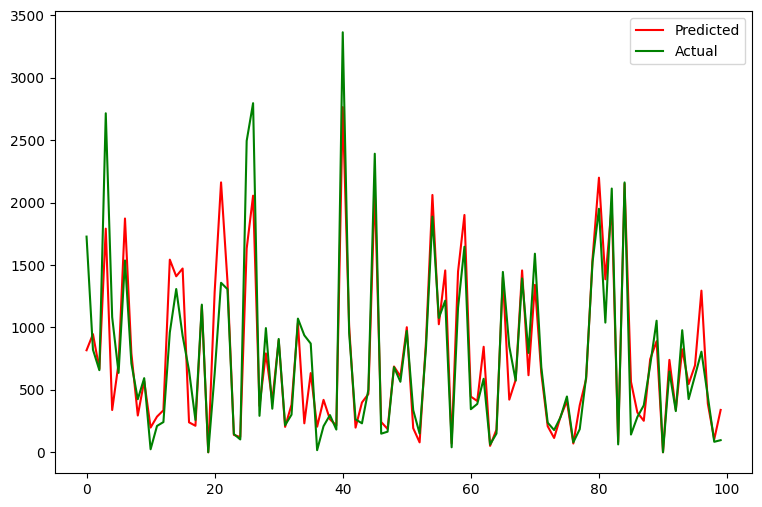

In [ ]:
knn_model = KNeighborsRegressor()
param_dict = {'n_neighbors':[3,5,7,9,11,13,15,21,23,25,50,80,100]}
knn_grid = GridSearchCV(knn_model, param_dict)

reg_models(knn_grid, x_train, x_test, y_train, y_test)

## Decision Tree

=============== Model Evaluation ===============
Mean Squared Error (MSE):        90814.3128
Root Mean Squared Error (RMSE):  301.3541
R^2 Score:                       0.7784
Adjusted R^2 Score:              0.7780


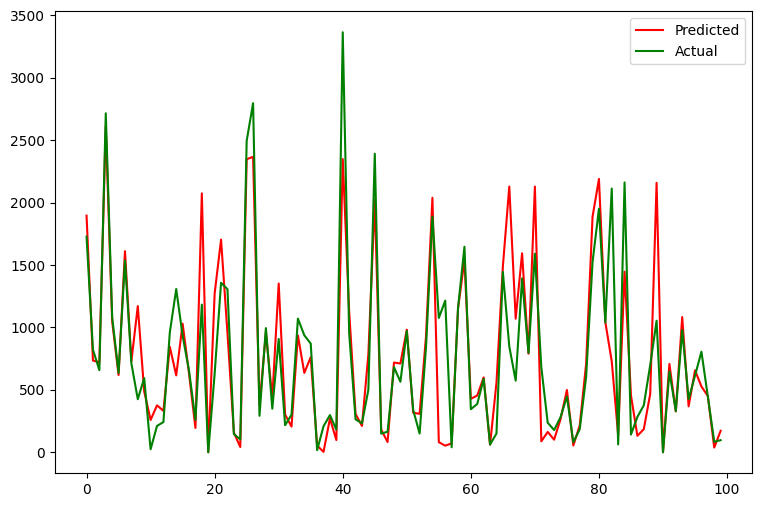

In [ ]:
reg_models(DecisionTreeRegressor(), x_train, x_test, y_train, y_test)

## Random Forest

=============== Model Evaluation ===============
Mean Squared Error (MSE):        45142.4629
Root Mean Squared Error (RMSE):  212.4676
R^2 Score:                       0.8898
Adjusted R^2 Score:              0.8896


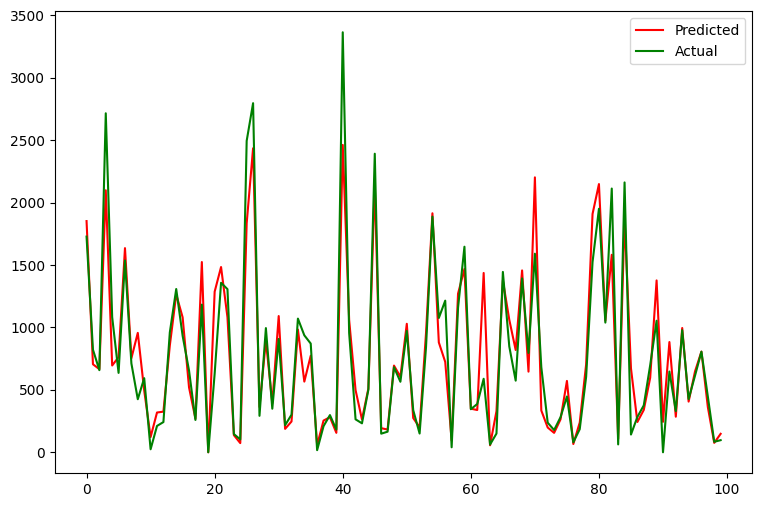

In [ ]:
random_forest_reg = RandomForestRegressor()
parameters = {'n_estimators' : [5,30,60,90], 'max_depth' : [500,60], 'max_leaf_nodes' : [120, 60,200,30,1000]}
rf_grid = GridSearchCV(random_forest_reg, parameters)

reg_models(rf_grid, x_train, x_test, y_train, y_test)

## Gradient Boosting Regressor

=============== Model Evaluation ===============
Mean Squared Error (MSE):        62172.6687
Root Mean Squared Error (RMSE):  249.3445
R^2 Score:                       0.8483
Adjusted R^2 Score:              0.8480


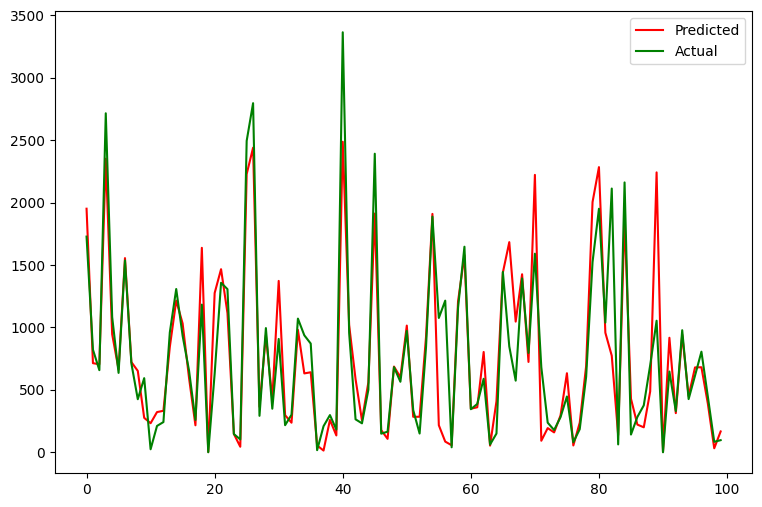

In [ ]:
gradient_boosting_reg = GradientBoostingRegressor()
parameters = {'n_estimators' : [100,70,150,20], 'max_depth' : [15,40,70,100]}
gb_cv = GridSearchCV(gradient_boosting_reg, parameters)

reg_models(gb_cv, x_train, x_test, y_train, y_test)

## XGBoost

=============== Model Evaluation ===============
Mean Squared Error (MSE):        42048.8168
Root Mean Squared Error (RMSE):  205.0581
R^2 Score:                       0.8974
Adjusted R^2 Score:              0.8972


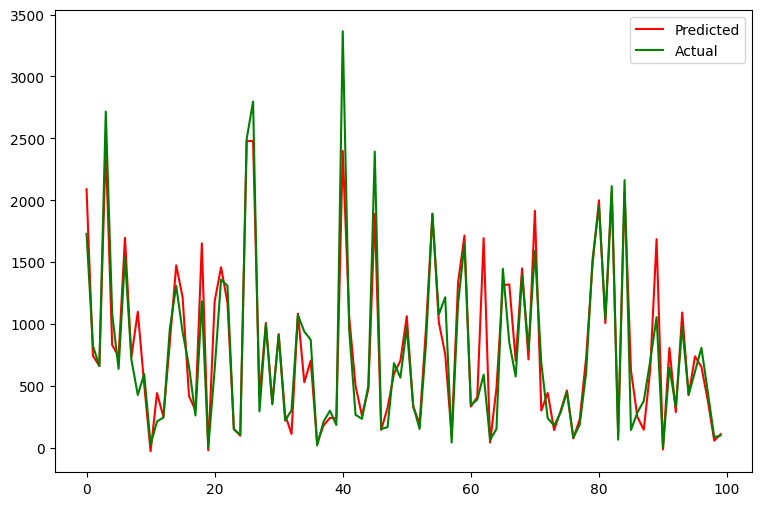

In [ ]:
xgboost_reg = XGBRegressor()
parameters = {'n_estimators' : [10,30,50,70,90,100,150], 'max_depth' : [100,7,75,20,40]}
xgb_cv = GridSearchCV(xgboost_reg, parameters)

reg_models(xgb_cv, x_train, x_test, y_train, y_test)

In [ ]:
all_model_matrices={'Mean_square_error':mean_sq_err_list,'Root_Mean_square_error':Rmse_list,'R2':r2_list,'Adjusted_R2':adj_r2_list}

model_name=['Linear','Ridge','Lasso','Elasticnet','K-Nearest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB']

matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index", columns=model_name)

matrices_df.T

,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
Linear,176067.042561,419.603435,0.570348,0.569562
Ridge,176067.318702,419.603764,0.570348,0.569561
Lasso,176106.926904,419.650958,0.570251,0.569464
Elasticnet,176124.389965,419.671765,0.570208,0.569422
K-Nearest_Neighbor,82243.179858,286.780717,0.799304,0.798937
Decision_Tree,90814.312785,301.354132,0.778388,0.777983
Random_Forest,45142.462885,212.467557,0.889840,0.889638
Gradient_Boosting,62172.668708,249.344478,0.848282,0.848004
Xtreme_GB,42048.816792,205.058082,0.897389,0.897202
